In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display the plots
%matplotlib inline

# scikit learn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
#from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline

import scikitplot as skplt

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : True})

# To display maximum columns
pd.set_option('display.max_columns', 50)

# To display maximum rows
pd.set_option('display.max_rows', 50)

# To set float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

df = train.copy()

In [3]:
X_train = train.drop(['Öbek İsmi'], axis=1)
y_train = train['Öbek İsmi']


y_train = y_train.map({'obek_1':0, 'obek_2':1, 'obek_3':2,
                           'obek_4':3, 'obek_5':4, 'obek_6':5,
                           'obek_7':6, 'obek_8':7}) # sıralama classification_report ile aynı olacak.

In [ ]:
X

In [5]:
y_train

0       3
1       4
2       7
3       2
4       2
       ..
5455    5
5456    5
5457    0
5458    7
5459    7
Name: Öbek İsmi, Length: 5460, dtype: int64

In [6]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
col = ["Öbek İsmi","Yıllık Ortalama Satın Alım Miktarı","Yıllık Ortalama Gelir","Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Sepete Atılan Ürün Adedi"]
X_train[col] = sc.fit_transform(train[col])
test[col] = sc.transform(test[col])


ValueError: could not convert string to float: 'obek_4'

In [9]:
train[col]

,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Gelir,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0.92,1.83,0.71,0.26
1,-0.17,-0.16,-0.35,-0.00
2,0.06,-0.07,1.45,0.74
3,-0.08,0.16,-0.19,-0.82
4,-0.02,0.44,-0.22,-0.78
...,...,...,...,...
5455,1.36,0.76,0.46,-0.39
5456,1.31,0.77,0.25,-0.42
5457,-0.15,0.09,-0.61,-0.92
5458,0.02,-0.08,0.78,0.77


In [13]:
from sklearn.ensemble import RandomForestClassifier

şşşşşş



KeyError: 'Öbek İsmi'

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(test)

In [2]:
def eval_metric(model, X_train, y_train, X_test, y_test):   
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

df = train.copy()

In [11]:
train

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,1.83,Büyük Şehir,Elektronik ve Teknolojik Ürünler,0.92,0.71,Etmiyor,obek_4,0.26
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,-0.16,Küçük Şehir,Spor Malzemeleri,-0.17,-0.35,Etmiyor,obek_5,-0.00
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,-0.07,Küçük Şehir,Giyim,0.06,1.45,Ediyor,obek_8,0.74
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,0.16,Kırsal,Giyim,-0.08,-0.19,Etmiyor,obek_3,-0.82
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,0.44,Büyük Şehir,Giyim,-0.02,-0.22,Etmiyor,obek_3,-0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,0.76,Köy veya Kasaba,Kozmetik,1.36,0.46,Etmiyor,obek_6,-0.39
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,0.77,Köy veya Kasaba,Ev ve Mobilya,1.31,0.25,Etmiyor,obek_6,-0.42
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,0.09,Küçük Şehir,Ev ve Mobilya,-0.15,-0.61,Etmiyor,obek_1,-0.92
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,-0.08,Büyük Şehir,Ev ve Mobilya,0.02,0.78,Ediyor,obek_8,0.77


In [4]:
df['A'] = (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / df['Yıllık Ortalama Sepete Atılan Ürün Adedi']) 
df['B'] = (df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Gelir']) 

In [5]:
test['A'] = (test['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / test['Yıllık Ortalama Sepete Atılan Ürün Adedi']) 
test['B'] = (test['Yıllık Ortalama Satın Alım Miktarı'] / test['Yıllık Ortalama Gelir']) 

In [6]:
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,A,B
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94,0.36,0.04
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.61,Küçük Şehir,Spor Malzemeleri,4145.73,11.55,Etmiyor,obek_5,82.18,0.14,0.02
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,Giyim,9924.38,55.35,Ediyor,obek_8,141.66,0.39,0.04
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.84,Kırsal,Giyim,6417.78,15.42,Etmiyor,obek_3,17.10,0.90,0.02
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,Giyim,7886.66,14.69,Etmiyor,obek_3,20.47,0.72,0.02


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Öbek İsmi", axis=1)
y = df["Öbek İsmi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object')

In [9]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough')

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

rf_model = Pipeline(steps=operations)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [11]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  0 102   2   0   2   0   1   2]
 [  0   0 135   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.97      0.95      0.96       138
      obek_2       0.96      0.94      0.95       109
      obek_3       0.92      0.97      0.95       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.98      0.95      0.96       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.96       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[554   0   0   0   0   0   0   0]
 [  0 438   0

In [12]:
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

RF Model accuracy score: 0.9570


In [14]:
rf_model["RF_model"].feature_importances_

array([0.0200607 , 0.02113399, 0.00669443, 0.01179309, 0.01195192,
       0.01326366, 0.00897158, 0.02268011, 0.01297376, 0.13909162,
       0.1680952 , 0.18412436, 0.18204158, 0.10884344, 0.08828055])

In [15]:
features = rf_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Cinsiyet', 'ordinalencoder__Yaş Grubu',
       'ordinalencoder__Medeni Durum', 'ordinalencoder__Eğitim Düzeyi',
       'ordinalencoder__İstihdam Durumu',
       'ordinalencoder__Yaşadığı Şehir',
       'ordinalencoder__En Çok İlgilendiği Ürün Grubu',
       'ordinalencoder__Eğitime Devam Etme Durumu', 'remainder__index',
       'remainder__Yıllık Ortalama Gelir',
       'remainder__Yıllık Ortalama Satın Alım Miktarı',
       'remainder__Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'remainder__Yıllık Ortalama Sepete Atılan Ürün Adedi',
       'remainder__A', 'remainder__B'], dtype=object)

In [16]:
rf_feature_imp = pd.DataFrame(data=rf_model["RF_model"].feature_importances_,
                              index=features,  # index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
remainder__Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.18
remainder__Yıllık Ortalama Sepete Atılan Ürün Adedi,0.18
remainder__Yıllık Ortalama Satın Alım Miktarı,0.17
remainder__Yıllık Ortalama Gelir,0.14
remainder__A,0.11
remainder__B,0.09
ordinalencoder__Eğitime Devam Etme Durumu,0.02
ordinalencoder__Yaş Grubu,0.02
ordinalencoder__Cinsiyet,0.02
ordinalencoder__Yaşadığı Şehir,0.01


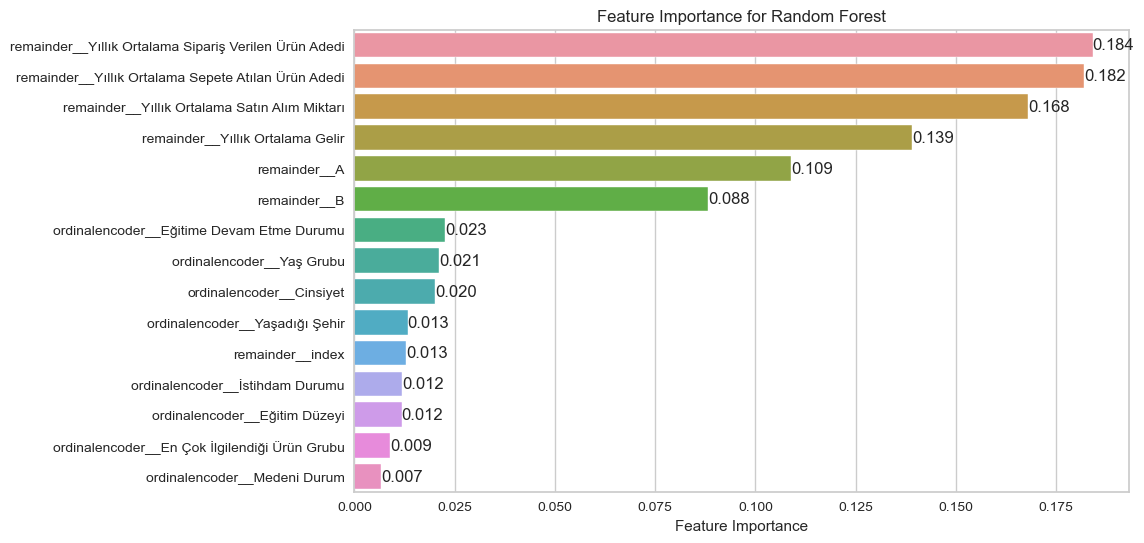

In [17]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

### GridSearchCV

In [18]:
param_grid = {
    'RF_model__n_estimators': [50, 100, 200],
    'RF_model__max_depth': [10, 20, 30],
    'RF_model__min_samples_split': [2, 5, 10],
    'RF_model__min_samples_leaf': [1, 2, 4],
    'RF_model__max_features': ['auto', 'sqrt'],
    'RF_model__criterion': ['gini', 'entropy']
}

operations_rf = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations_rf)

rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring="accuracy", 
                             cv=5,
                             n_jobs=-1,
                             return_train_score=True)

rf_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      d...
                                       ('RF_model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['gini', 'entropy'],
                         'RF_model__max_depth': [10, 20, 30],
                         'RF_model__max_features': ['auto', 'sqrt'],
                         'RF_model__min_samples_leaf': [1, 2, 4],
                         'RF_model__min_samples_split': [2, 5, 10],
                         'RF_model__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [19]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  0 102   2   0   2   0   1   2]
 [  0   0 135   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.97      0.95      0.96       138
      obek_2       0.96      0.94      0.95       109
      obek_3       0.92      0.97      0.95       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.98      0.95      0.96       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.96       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[529   1   5   6   4   3   5   1]
 [  3 413   2

In [20]:
from sklearn.metrics import accuracy_score

y_pred = rf_grid_model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

RF Model accuracy score: 0.9570
